# Hello Ensemble Classifiers

In [1]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2


### Voting Classifier

In [2]:
# scikit-learn imports
from sklearn.datasets import make_moons  
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Get data

In [3]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Plot data

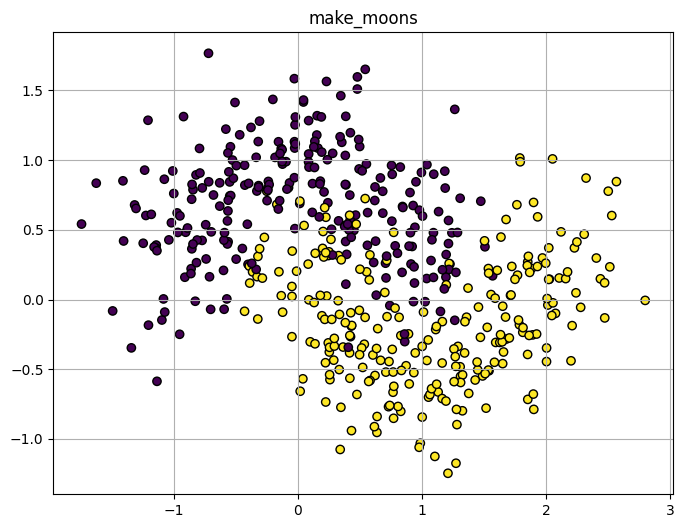

In [5]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')  # Color based on target value
plt.title("make_moons")
plt.grid(True)
plt.show()


Train voting Classifier

In [6]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

Evaluate Model

Overall Accuracy

In [8]:
voting_clf.score(X_test, y_test)

0.912

Individual classifier accuracies

In [9]:
for name, clf in voting_clf.named_estimators_.items():
    print(f"Classifier {name}: accuracy = {clf.score(X_test, y_test)}")

Classifier lr: accuracy = 0.864
Classifier rf: accuracy = 0.896
Classifier svc: accuracy = 0.896


predict() performs hard voting

In [10]:
voting_clf.predict(X_test[:1])

array([1])

Perform soft voting

In [11]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True 

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

Soft voting produced a better result than hard voting, as it gives more weight to highly confident votes

### Bagging and Pasting

Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

print("Bagging ensemble accuracy: ", bag_clf.score(X_test, y_test))

Bagging ensemble accuracy:  0.904


Pasting (bootstrap=False)

In [14]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False,
                max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

print("Pasting ensemble accuracy: ", bag_clf.score(X_test, y_test))

Pasting ensemble accuracy:  0.92


### Out-of-Bag Evaluation (oob_score=True)

In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

print("OOB accuracy: ", bag_clf.oob_score_)

OOB accuracy:  0.896


Compare OOB validation score to test score

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accy)

Accuracy:  0.92


Interestingly better result than OOB validation result

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

rnd_accy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy: ", rnd_accy)

Random Forest Classifier Accuracy:  0.912


### Extremely Randomized Trees (Extra-trees) Classifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

ext_clf.fit(X_train, y_train)

y_pred = ext_clf.predict(X_test)

ext_accy = accuracy_score(y_test, y_pred)
print("Extra-trees Classifier Accuracy: ", ext_accy)

Extra-trees Classifier Accuracy:  0.912


### Feature Importance from Random Forest

In [22]:
from sklearn.datasets import load_iris

ds_iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(ds_iris.data, ds_iris.target)

for score, name in zip(rnd_clf.feature_importances_, ds_iris.data.columns):
    print(f"Feature '{name}', importance = {round(score, 2)}")

Feature 'sepal length (cm)', importance = 0.11
Feature 'sepal width (cm)', importance = 0.02
Feature 'petal length (cm)', importance = 0.44
Feature 'petal width (cm)', importance = 0.42


### Adaboost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

ada_accy = accuracy_score(y_test, y_pred)
print("Adaboost Classifier Accuracy: ", ext_accy)

Adaboost Classifier Accuracy:  0.912


### Gradient Boosting

In [26]:
# Prepare Quadratic data
np.random.seed(42)
X_quad = np.random.rand(100, 1) - 0.5
y_quad = 3 * X_quad[:, 0] ** 2 + 0.05 * np.random.randn(100)

Plot data

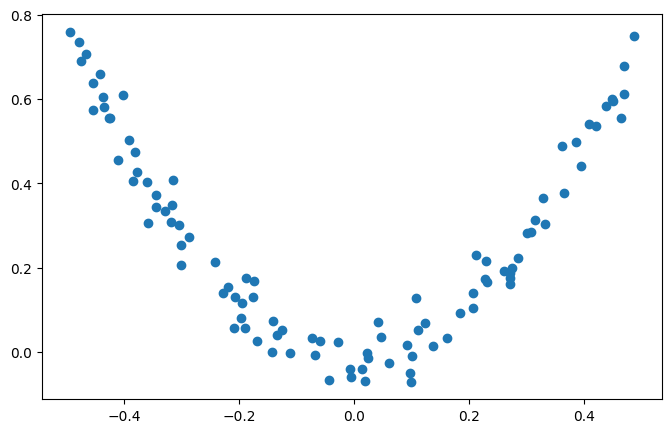

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(X_quad, y_quad)
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_quad, y_quad)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

### Stacking Classifier

In [29]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5) # number of cross-validation folds

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [31]:
y_pred = stacking_clf.predict(X_test)

stack_accy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy: ", stack_accy)

Stacking Classifier Accuracy:  0.928


Stacking was even better than Voting Classifier